<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_05_03_%EB%B6%88%EA%B7%A0%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 필요 라이브러리 import

In [ ]:
#!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification 

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

# 불균형 데이터 처리 - 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

# 불균형 데이터 처리 - 언더샘플링
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 검증
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.model_selection import RepeatedStratifiedKFold #Cross-Validation
from sklearn.model_selection import cross_validate #Cross-Validation

# 불균형 데이터에 처리에 따른 랜덤포레스트 결과 확인 함수 생성
def Randomforest_Result(x,y,title):
  rf = RandomForestClassifier(criterion = "entropy")
  cv_rf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  scores = cross_validate(rf,x,y, scoring = "f1", cv = cv_rf, n_jobs = -1)
  print(title, ":", "3-Fold CV f1 score: %.4f" % np.mean(scores["test_score"]))

  return


### 2. undersampling

#### 2-1 데이터셋 준비 및 확인

In [ ]:
# 데이터셋 준비
X_data, y_class = make_classification(n_classes = 2, class_sep = 2, n_samples = 10000,
                                      n_features = 20, weights = [0.9,0.1], flip_y = 0,
                                      n_clusters_per_class = 1, random_state = 10)

print(X_data.shape, y_class.shape)


(10000, 20) (10000,)


In [ ]:
# count_and_plot 그리기 함수
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
 counter = Counter(y)
 for k,v in counter.items ():
  print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len (y) * 100))
 pyplot.bar ( counter.keys (), counter.values ())
 pyplot.show() 

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


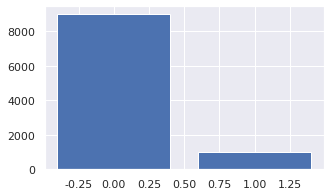

In [ ]:
# 데이터셋 가시화
plt.figure(figsize = (5,3))
count_and_plot(y_class)

In [ ]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링 원본 데이터 결과 : 3-Fold CV f1 score: 0.9894


#### 2-2 Random Under Sampling

In [ ]:
# sampling_strategy =  "majority"(소수 집단과 동일하게 샘플링)
under_random = RandomUnderSampler(sampling_strategy = "majority")
X_random, y_random = under_random.fit_resample(X_data, y_class)

Class=0, n=1000 (50.000%)
Class=1, n=1000 (50.000%)


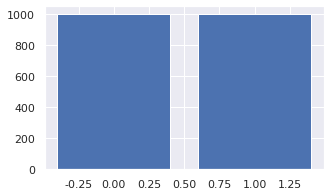

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_random)

In [ ]:
Randomforest_Result(X_random,y_random, "언더샘플링_랜덤언더샘플링 결과")

언더샘플링_랜덤언더샘플링 결과 : 3-Fold CV f1 score: 0.9948


In [ ]:
# sampling_strategy
# 0과 1 사이의 숫자를 지정하여 샘플링
under_random_05 = RandomUnderSampler(sampling_strategy = 0.5)
X_random_05, y_random_05 = under_random_05.fit_resample(X_data,y_class)

Class=0, n=2000 (66.667%)
Class=1, n=1000 (33.333%)


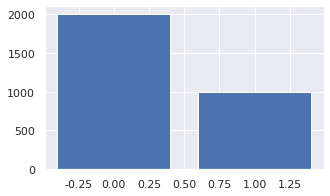

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_random_05)

In [ ]:
Randomforest_Result(X_random_05, y_random_05, "언더샘플링_랜덤샘플링비율 5:5 결과")

언더샘플링_랜덤샘플링비율 5:5_결과 : 3-Fold CV f1 score: 0.9940


#### 2-3 TomekLinks

In [ ]:
# 토멕링크
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_data, y_class)

Class=0, n=8993 (89.993%)
Class=1, n=1000 (10.007%)


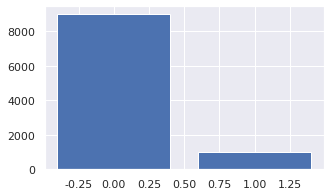

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_tl)

In [ ]:
Randomforest_Result(X_tl, y_tl, "언더샘플링_토멕링크 결과")

언더샘플링_토멕링크_결과 : 3-Fold CV f1 score: 0.9891


#### 2-4 OSS(OneSidedSelection)

In [ ]:
# OSS
oss = OneSidedSelection(random_state = 42)
X_oss, y_oss = oss.fit_resample(X_data, y_class)

Class=0, n=7666 (88.461%)
Class=1, n=1000 (11.539%)


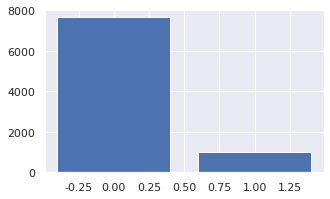

In [ ]:
plt.figure(figsize=(5,3))
count_and_plot(y_oss)

In [ ]:
Randomforest_Result(X_oss, y_oss, "언더샘플링_OSS 결과")

언더샘플링_OSS 결과 : 3-Fold CV f1 score: 0.9893


### 3. Oversampling

#### 3-1 데이터셋 준비 및 확인

(10000, 20) (10000,)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


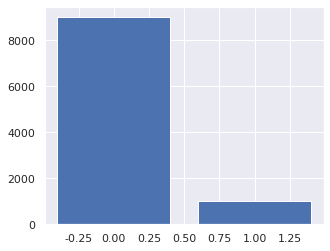

In [ ]:
# 데이터셋 준비
X_data, y_class = make_classification(n_classes = 2, class_sep = 2, n_samples = 10000,
                                      n_features = 20, weights = [0.9,0.1], flip_y = 0,
                                      n_clusters_per_class = 1, random_state = 10)

print(X_data.shape, y_class.shape)


plt.figure(figsize=(5,4))
count_and_plot(y_class)

In [ ]:
Randomforest_Result(X_data, y_class, "오버샘플링_원본데이터 결과")

오버샘플링_원본데이터 결과 : 3-Fold CV f1 score: 0.9886


#### 3-2 RandomOverSampling

In [ ]:
# 랜덤오버샘플링

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


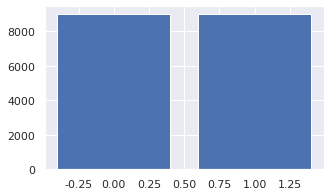

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_ros)

#### 3-3 SMOTE

In [ ]:
# SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_data,y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


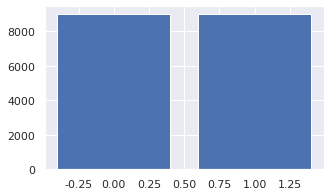

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_sm)

In [ ]:
Randomforest_Result(X_sm, y_sm, "오버샘플링_smote 결과")

오버샘플림_smote 결과 : 3-Fold CV f1 score: 0.9984


#### 3-4 ADASYN

In [ ]:
# ADASYN

ada = ADASYN(random_state = 42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

Class=0, n=9000 (49.972%)
Class=1, n=9010 (50.028%)


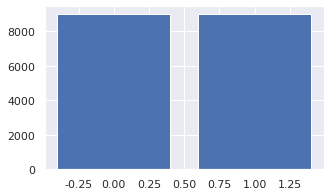

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_ada)

In [ ]:
Randomforest_Result(X_ada, y_ada, "오버샘플링_ADASYN 결과")

오버샘플링_ADASYN : 3-Fold CV f1 score: 0.9986


#### 3-5 boderline SMOTE

In [ ]:
# Boderline Smote

bor_sm = BorderlineSMOTE(random_state = 42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


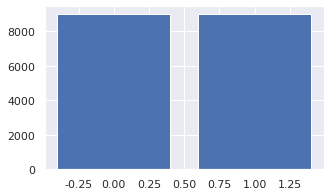

In [ ]:
plt.figure(figsize = (5,3))
count_and_plot(y_bor_sm)

In [ ]:
Randomforest_Result(X_bor_sm,y_bor_sm,"오버샘플링_boderlineSMOTE 결과")

오버샘플링_boderlineSMOTE 결과 : 3-Fold CV f1 score: 0.9988
